1. Data Exploration and Processing

Import relevant libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
import re

Read the data

In [62]:
df = pd.read_csv('../dataset/amazon_dataset.csv')
df.head()

,product_title,user_name,rating,review
0,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...",Galaxy A54 Product Overview,5.0,Am not a power user or someone who lives on th...
1,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...",NaN,5.0,Very Durable! Very easy to set up and use. It ...
2,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...",NaN,4.0,This turned out to be the perfect phone model ...
3,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...",NaN,5.0,I've only had it for a few days now and it's h...
4,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Unl...",NaN,5.0,Not the best nor the worst. It adequately meet...


In [63]:
df.shape

(1045, 4)

Exploratory Data Analysis

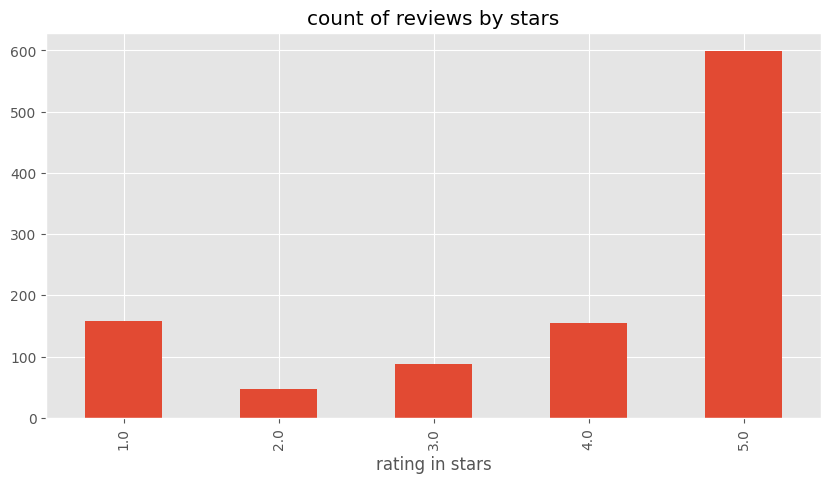

In [64]:
ax = df['rating'].value_counts().sort_index().plot(kind= 'bar' , 
                                        title= 'count of reviews by stars' , 
                                        figsize= (10,5))
ax.set_xlabel('rating in stars')
plt.show()

2. Data Pre-processing

Necessary NLTK resources

In [65]:
from nltk.corpus import stopwords


# nltk.data.path.append('c:/Users/Hasib282/anaconda/nltk_data')

nltk.download('vader_lexicon', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('words', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('maxent_ne_chunker', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('stopwords', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt_tab', download_dir='c:/Users/Hasib282/anaconda/nltk_data')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nl

True

Clean product_title And user_name

In [66]:
def clean_product_title(product_title):
  cleaned_name = re.sub(r'[^\w\s]', '', product_title).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

def clean_user_name(user_name):
  cleaned_name = re.sub(r'[^\w\s]', '', user_name).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

df['product_title'] = df['product_title'].apply(clean_product_title)

df['user_name'] = df['user_name'].fillna("Amazon User")
df['user_name'] = df['user_name'].apply(clean_user_name)


Clean review

In [67]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\d+','',text) # Remove numbers
    text = re.sub(r'[^\w\s]','',text) # Remove punctuation
    text = re.sub(r'\s+',' ' , text) # Remove extra spaces
    text = text.strip() # Strip leading and trailing spaces
    tokens  = nltk.word_tokenize(text) # Tokenize text
    filtered_words = [word for word in tokens if word not in stop_words] # Remove stop words
    return ' '.join(filtered_words) # Join filtered words back into a single string

# Apply clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text)

df['ID'] = range(1, len(df) + 1)

df.to_csv('amazon_datasets.csv', index=False)

df

,product_title,user_name,rating,review,ID
0,SAMSUNG Galaxy A54,Galaxy A54 Product,5.0,power user someone lives phone cant rate hi te...,1
1,SAMSUNG Galaxy A54,Amazon User,5.0,durable easy set use takes awesome quality cam...,2
2,SAMSUNG Galaxy A54,Amazon User,4.0,turned perfect phone model havent single issue...,3
3,SAMSUNG Galaxy A54,Amazon User,5.0,ive days hurting send back someone got plus fr...,4
4,SAMSUNG Galaxy A54,Amazon User,5.0,best worst adequately meets basic needs provid...,5
5,SAMSUNG Galaxy A54,Amazon User,5.0,putting getting new phone quite awhile afraid ...,6
6,SAMSUNG Galaxy A54,Amazon Customer,5.0,phone works expectedi done research regarding ...,7
7,SAMSUNG Galaxy A54,Amazon Customer,4.0,phone good middle road phone want bells whistl...,8
8,SAMSUNG Galaxy S24,Galaxy S24 Series,5.0,pleeeeease people stop complaining display thi...,9
9,SAMSUNG Galaxy S24,Amazon User,5.0,ever device deserving star rating samsung gala...,10


3. VADER Model

Initialize VADER

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [69]:
example = df['review'] [10]
example

'works fine battery good performance great cameras good display looks great however samsung still fixed issue screen burnin cant use apps like tiktok instagram long screen easily burns start seeing ghost images screen issue related oled amoled displays'

In [70]:
sia.polarity_scores(example)

{'neg': 0.084, 'neu': 0.57, 'pos': 0.346, 'compound': 0.9299}

Apply Vader

In [71]:
#Run the polarity score on the whole dataset
res = {}
for i, row in tqdm(df.iterrows() , total= len(df)):
    review = row['review']
    myid   = row['ID']
    res[myid] = sia.polarity_scores(review)

res

  0%|          | 0/1045 [00:00<?, ?it/s]

100%|██████████| 1045/1045 [00:01<00:00, 524.60it/s]


{1: {'neg': 0.028, 'neu': 0.788, 'pos': 0.185, 'compound': 0.9906},
 2: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9136},
 3: {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.9421},
 4: {'neg': 0.067, 'neu': 0.523, 'pos': 0.41, 'compound': 0.9803},
 5: {'neg': 0.15, 'neu': 0.635, 'pos': 0.215, 'compound': 0.4417},
 6: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.9661},
 7: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.9701},
 8: {'neg': 0.096, 'neu': 0.726, 'pos': 0.178, 'compound': 0.7624},
 9: {'neg': 0.065, 'neu': 0.628, 'pos': 0.307, 'compound': 0.9984},
 10: {'neg': 0.009, 'neu': 0.699, 'pos': 0.292, 'compound': 0.9961},
 11: {'neg': 0.084, 'neu': 0.57, 'pos': 0.346, 'compound': 0.9299},
 12: {'neg': 0.153, 'neu': 0.52, 'pos': 0.328, 'compound': 0.8777},
 13: {'neg': 0.048, 'neu': 0.647, 'pos': 0.305, 'compound': 0.9831},
 14: {'neg': 0.065, 'neu': 0.628, 'pos': 0.307, 'compound': 0.9984},
 15: {'neg': 0.009, 'neu': 0.699, 'pos': 0.292, 'compou

Plot VADER

In [72]:
vaders = pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index' : 'ID'})
vaders = vaders.merge(df,how='left')

vaders

,ID,neg,neu,pos,compound,product_title,user_name,rating,review
0,1,0.028,0.788,0.185,0.9906,SAMSUNG Galaxy A54,Galaxy A54 Product,5.0,power user someone lives phone cant rate hi te...
1,2,0.000,0.724,0.276,0.9136,SAMSUNG Galaxy A54,Amazon User,5.0,durable easy set use takes awesome quality cam...
2,3,0.000,0.765,0.235,0.9421,SAMSUNG Galaxy A54,Amazon User,4.0,turned perfect phone model havent single issue...
3,4,0.067,0.523,0.410,0.9803,SAMSUNG Galaxy A54,Amazon User,5.0,ive days hurting send back someone got plus fr...
4,5,0.150,0.635,0.215,0.4417,SAMSUNG Galaxy A54,Amazon User,5.0,best worst adequately meets basic needs provid...
5,6,0.000,0.667,0.333,0.9661,SAMSUNG Galaxy A54,Amazon User,5.0,putting getting new phone quite awhile afraid ...
6,7,0.000,0.667,0.333,0.9701,SAMSUNG Galaxy A54,Amazon Customer,5.0,phone works expectedi done research regarding ...
7,8,0.096,0.726,0.178,0.7624,SAMSUNG Galaxy A54,Amazon Customer,4.0,phone good middle road phone want bells whistl...
8,9,0.065,0.628,0.307,0.9984,SAMSUNG Galaxy S24,Galaxy S24 Series,5.0,pleeeeease people stop complaining display thi...
9,10,0.009,0.699,0.292,0.9961,SAMSUNG Galaxy S24,Amazon User,5.0,ever device deserving star rating samsung gala...


Visualize VADER

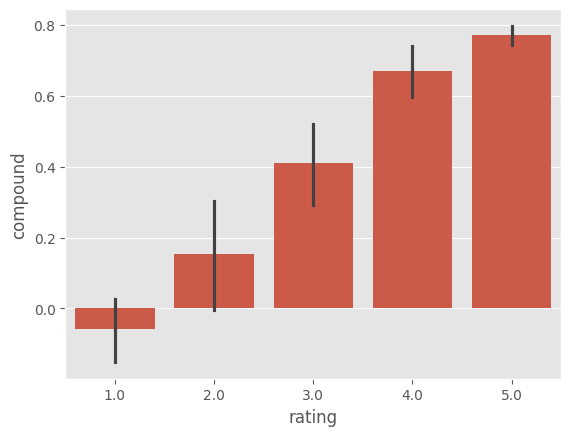

In [73]:
sns.barplot(data=vaders , x='rating' , y = 'compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

Sub-plot for each category

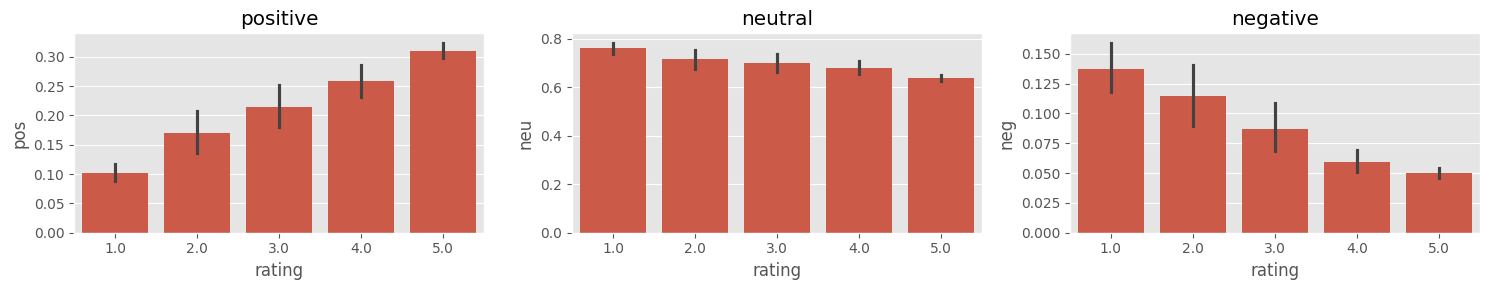

In [74]:
fig, axs=plt.subplots(1, 3 , figsize=(15 , 3))
sns.barplot(data=vaders , x='rating' , y= 'pos' , ax=axs[0])
sns.barplot(data=vaders , x='rating' , y= 'neu' , ax=axs[1])
sns.barplot(data=vaders , x='rating' , y= 'neg' , ax=axs[2])
axs[0].set_title('positive'),
axs[1].set_title('neutral'),
axs[2].set_title('negative'),
plt.tight_layout()
plt.show()

4. Roberta Pretrained Model

Install relevant modules

In [75]:
# pip install transformers
# pip install torch  
# pip install tensorflow   
# pip install flax 
# pip install --upgrade tensorflow-intel
# pip install ml-dtypes==0.2.0

In [76]:
import torch
import sys
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [77]:
print("sys path",sys.path)
print(f"PyTorch version: {torch.__version__}")

sys path ['e:\\PDF\\12th sem\\Thesis\\code\\python-project', 'c:\\Users\\Hasib282\\anaconda\\python312.zip', 'c:\\Users\\Hasib282\\anaconda\\DLLs', 'c:\\Users\\Hasib282\\anaconda\\Lib', 'c:\\Users\\Hasib282\\anaconda', '', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\Pythonwin']
PyTorch version: 2.4.1


Initializing Model

In [78]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

print("Model and tokenizer loaded successfully.")

c:\Users\Hasib282\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model and tokenizer loaded successfully.


Apply Roberta model

In [79]:
# Apply on a single Data
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
scores_dict

{'roberta_neg': 0.1769639, 'roberta_neu': 0.33272418, 'roberta_pos': 0.4903119}

In [80]:
# Create function for checking polarity score of roberta 
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt", padding="max_length", max_length=512, truncation=True)
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [81]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    review = row['review']
    myid   = row['ID']
    vader_result = sia.polarity_scores(review)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(review)
    both = {**vader_result_rename , **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for Id {myid}')


100%|██████████| 1045/1045 [22:24<00:00,  1.29s/it]


In [94]:
result_df = pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns={'index' : 'ID'})
result_df = result_df.merge(df,how='left')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
result_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_title',
       'user_name', 'rating', 'review'],
      dtype='object')

Compare Results:

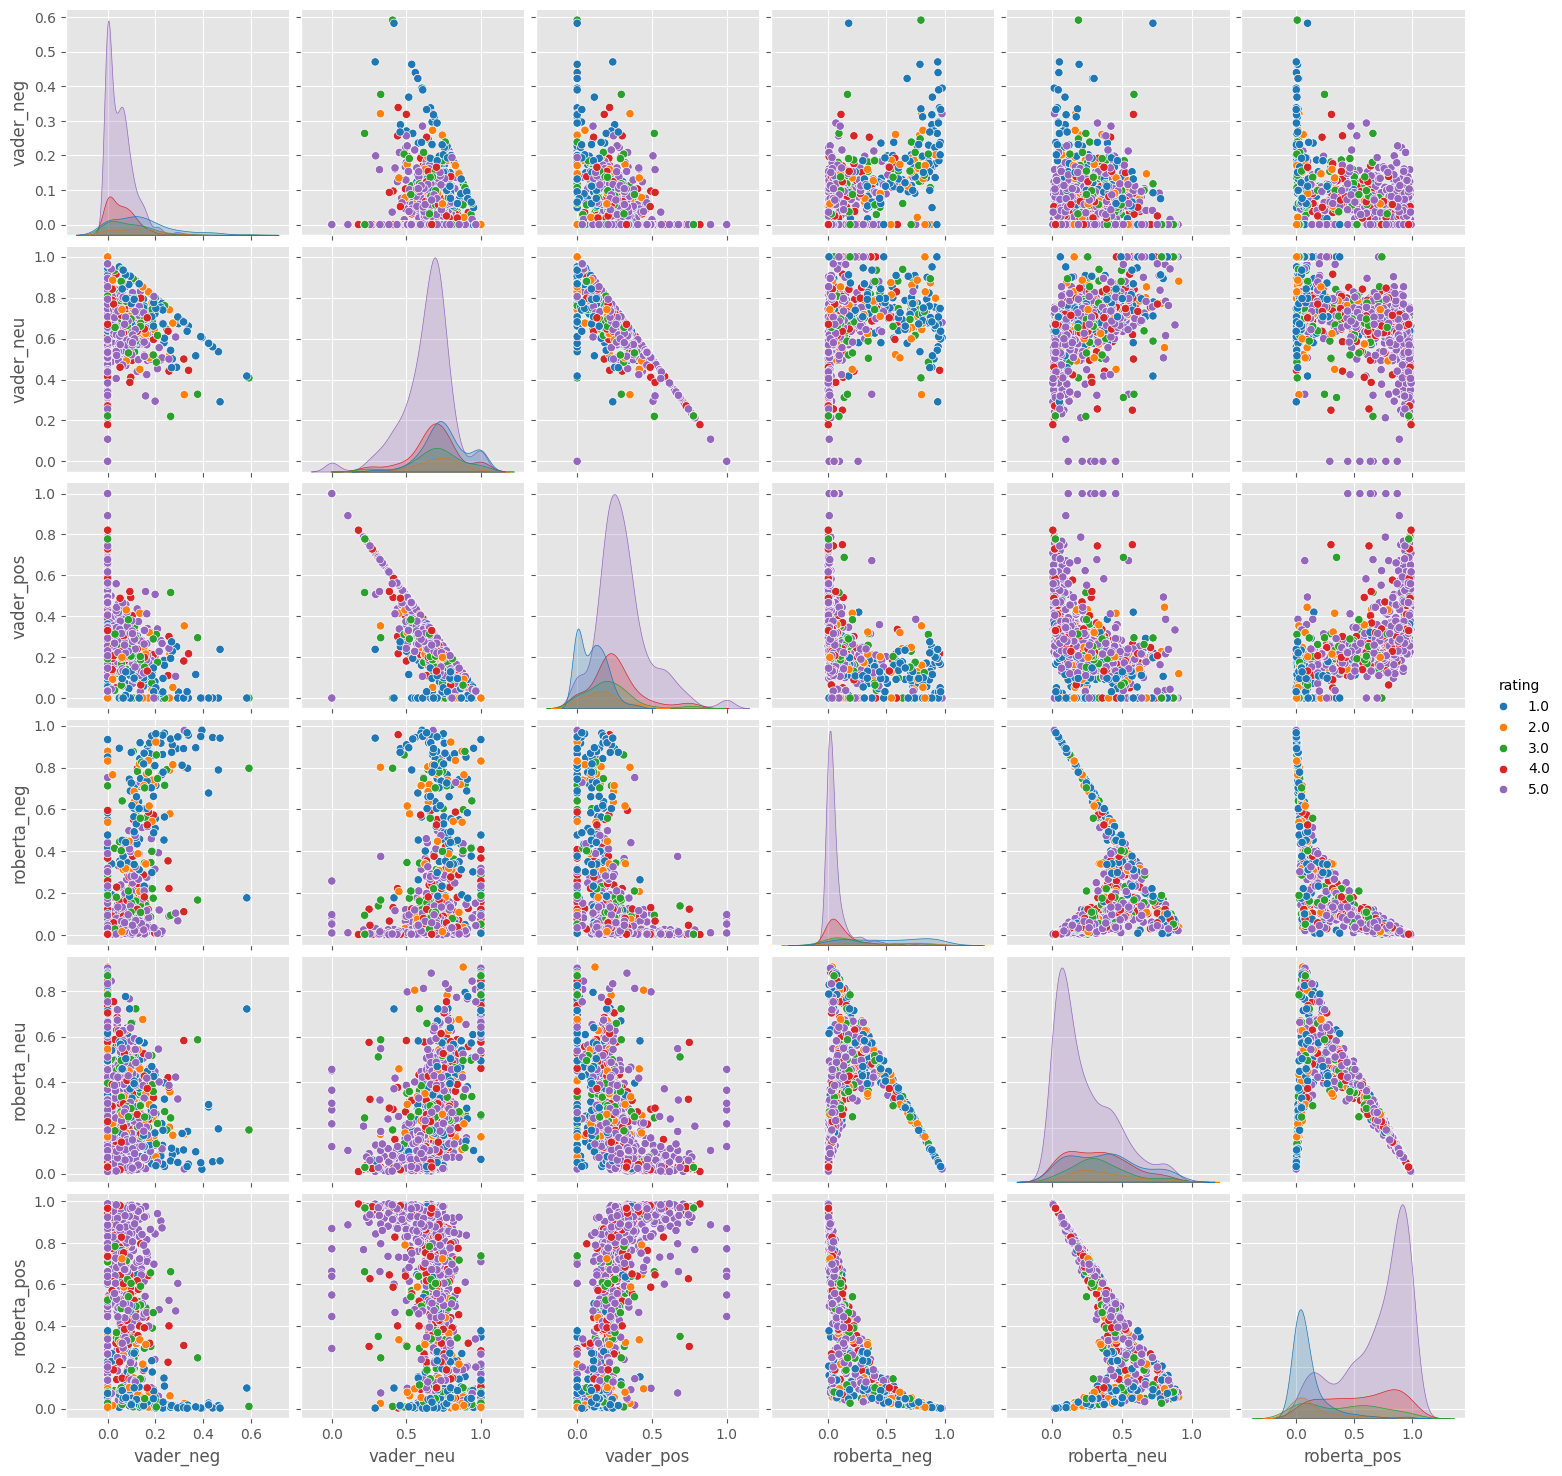

In [89]:
sns.pairplot(data=result_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='rating',
             palette="tab10")

plt.show()

In [92]:
result_df.to_csv('clean_review.csv', index=False)
new_df = result_df[['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating', 'review']]
new_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,review
0,1,0.028,0.788,0.185,0.9906,0.019180,0.289552,0.691268,5.0,power user someone lives phone cant rate hi te...
1,2,0.000,0.724,0.276,0.9136,0.019909,0.144537,0.835553,5.0,durable easy set use takes awesome quality cam...
2,3,0.000,0.765,0.235,0.9421,0.022816,0.101976,0.875208,4.0,turned perfect phone model havent single issue...
3,4,0.067,0.523,0.410,0.9803,0.040998,0.174286,0.784716,5.0,ive days hurting send back someone got plus fr...
4,5,0.150,0.635,0.215,0.4417,0.280535,0.506481,0.212984,5.0,best worst adequately meets basic needs provid...
5,6,0.000,0.667,0.333,0.9661,0.004813,0.030188,0.964998,5.0,putting getting new phone quite awhile afraid ...
6,7,0.000,0.667,0.333,0.9701,0.004856,0.052133,0.943011,5.0,phone works expectedi done research regarding ...
7,8,0.096,0.726,0.178,0.7624,0.095029,0.306466,0.598505,4.0,phone good middle road phone want bells whistl...
8,9,0.065,0.628,0.307,0.9984,0.042633,0.301777,0.655590,5.0,pleeeeease people stop complaining display thi...
9,10,0.009,0.699,0.292,0.9961,0.019068,0.316799,0.664133,5.0,ever device deserving star rating samsung gala...
